In [1]:
import osmnx as ox
import networkx
import math
from shapely.geometry import Point, LineString, Polygon
from shapely.affinity import rotate

In [ ]:
class Node:
    def __init__(self, point_x, point_y, grade=0, id_=None, parent=None):
        self.x = point_x
        self.x = point_y
        self.grade = grade
        self.parent = parent
        self.id = id_
        self.traffic_signals = None  
        
class Intersection:
    def __init__(self, point_x, point_y, grade=0, osmid=None):
        self.__x = point_x
        self.__y = point_y
        self.__grade = grade
        self.__osmid = osmid
        self.__type = None
        self.__nodes = []
        
    def get_x(self):
        return self.__x
    
    def set_x(self, x):
        self.__x = x

    def get_y(self):
        return self.__y
    
    def set_y(self, y):
        self.__y = y

    def get_grade(self):
        return self.__grade
    
    def set_grade(self, grade):
        self.__grade = grade

    def get_osmid(self):
        return self.__osmid
    
    def set_osmid(self, osmid):
        self.__osmid = osmid

    def get_nodes(self):
        return self.__node
    
    def set_nodes(self, nodes):
        self.__nodes = nodes

            

class Lane:
    def __init__(self, line_string, lane_no):

        self.lane_polygon = None
        self.lane_center = line_string
        # this is a line string, which represents straight (and curved) roads
        self.lane_no = None
        self.road = None
        self.speed_limit = None
        self.name = str(self.road.name)+"-lmsp-" + str(self.speed_limit)
        x, y = self.lane_center.coords.xy
        self.start_x = x[0]
        self.start_y = y[0]
        self.end_x = x[-1]
        self.end_y = y[-1]
        self.traffic = []
        
    def insert_car(self, car):
        dist_from_nn = car.get_distance_from_next_node()
        for i, c in enumerate(self.traffic):
            if dist_from_nn > c.get_distance_from_next_node():
                pass
            else:
                self.traffic.insert(i, c)
                break
        
class SubNodeString:
    def __init__(self, line_string):
        self.__sub_nodes 
    
        

class Road:
    def __init__(self, start_node=None, end_node=None, _type='straight'):
        self.start_node = start_node
        self.end_node = end_node
        self.type = _type
        self.speed_limit = None
        self.heading = None
        self.length = None
        self.no_of_lanes = 2
        self.lanes = []
        # .lanes will contain the lane objects under this road 
        self.lane_width = None
        self.min_bounding_box = None
        self.bounding_polygon = None
        self.name = str(self.start_node.id) + "-" + str(self.end_node.id) + "-msp-" + str(self.speed_limit)


class Map:
    def __init__(self):
        self.__nodes_table= dict()
        self.__roads_table= dict()
        self.__graph = networkx.DiGraph()


In [ ]:
import math

def get_perpendicular_segment(theta1, theta2, point):
    x, y = point
    slope = math.tan((theta1 + theta2)/2)
    print(slope)
    c = y - slope*x
    return 1, -slope, -c


In [ ]:
# print(a.index(5))
a.remove(5)
a

In [ ]:
a= []


In [ ]:
point = (0, 0)
theta1 = math.pi
theta2 = -math.pi/2

get_perpendicular_segment(theta1, theta2, point)

In [ ]:
address = '567 Stinchcomb Drive, Columbus, Ohio'
distance=300
network_type='drive'

G = ox.graph_from_address(address, distance)
ox.plot_graph(G)

In [9]:
G.succ[229703693][3831576280]



AtlasView({0: {'oneway': True, 'lanes': '2', 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff46d8c30b8>, 'highway': 'tertiary', 'name': 'Olentangy River Road', 'osmid': 44631792, 'length': 106.80311521767831}})

In [8]:
G._node[3831576280]

{'highway': 'traffic_signals',
 'osmid': 3831576280,
 'x': -83.0260721,
 'y': 40.0240776}

In [ ]:
nodes_table = dict()
roads_table = dict()
G1=G
for n_start, value in G1.succ.items():
    osmid1 = G1._node[n_start]['osmid']
    x = G1._node[n_start]['x']
    y = G1._node[n_start]['y']
    if not osmid1 in nodes_table.keys():
        nodes_table[osmid1] = ns = Node(point_x=x,point_y=y, osmid=osmid1)
    else:
        ns = nodes_table[osmid1]
        
    for n_end, road in value.items():
        osmid2 = G1._node[n_end]['osmid']
        x = G1._node[n_end]['x']
        y = G1._node[n_end]['y']
        
        if not osmid2 in nodes_table.keys():
            nodes_table[osmid2] = ne = Node(point_x=x,point_y=y, osmid=osmid2)
        else:
            ne = nodes_table[osmid2]
        R = road[0]
        print(road[0]['geometry'])
        name = R['name'] if 'name' in R.keys() else None
        our_road = create_road(start_node = ns, end_node = ne, name=name, osmid=R['osmid'])
        
        
        
            


In [ ]:
from numpy import sign

def get_sub_node_coords(x1, y1, x2, y2):    
        
    os = (x1,y1)
    oe = (x2,y2)
    
    distance = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    slope = math.atan2(y2-y1, x2-x1)
    fs = (0,0)
    fe = (distance, 0)
    
    if abs(slope) <= math.pi/2:
        fs1 = Point(10, 0)
        fs2 = Point(10, -4)

        fe1 = Point(distance-10, 0)
        fe2 = Point(distance-10, -4)
    
    else:
        fs1 = Point(-10, 0)
        fs2 = Point(-10, -4)

        fe1 = Point(-distance+10, 0)
        fe2 = Point(-distance+10, -4)
                
    
    os2 = rotate(fs2, angle=slope, origin=fs, use_radians=True)
    oe2 = rotate(fe2, angle=slope, origin=fs, use_radians=True)
         
        
    return [(x1+ os2.coords[0][0],y1+ os2.coords[0][1]), (x1+ oe2.coords[0][0],y1+ oe2.coords[0][1])]
    
    
    
    

In [ ]:
def create_road(start_node, end_node, name, osmid):
    
    x1,y1 = start_node.x, start_node.y
    x2,y2 = end_node.x, end_node.y
    
    [p1, p2] = get_sub_node_coords(x1, y1, x2, y2)
    
    # lane 0: (sn1, sn3)
    # lane 1: (sn2, sn4)
    
    sn1 = SubNode(point_x=p1[0], point_y=p1[1], parent=start_node)
    sn2 = SubNode(point_x=p2[0], point_y=p2[1], parent=start_node)

    
#     ls0 = LineString([p1,p3])
#     ls1 = LineString([p2,p4])
    
#     lane_0 = Lane(line_string=ls0, lane_no=0)
#     lane_1 = Lane(line_string=ls1, lane_no=1)
    
    road = Road(start_node=sn1, end_node=sn2)

#     road.lanes.append(lane_0)
#     road.lanes.append(lane_1)
    
    return road

    
    
    
    
    

In [ ]:
l = LineString([(,0),(1,0)])
l

In [4]:
# from core.lib.maps.map import Intersection, Road, RoadString, Node, SubNode
import math
from shapely.geometry import Point, LineString, Polygon
from shapely.affinity import rotate
import networkx as nx
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from core.lib.maps.map import Intersection, Road, RoadString, Node, SubNode


def convert_to_traffic_graph(G):

    intersections_table = dict()
    roads_table = dict()
    tg = nx.DiGraph()

    for n_start, value in G.succ.items():
        osmid = G._node[n_start]['osmid']
        x = G._node[n_start]['x']
        y = G._node[n_start]['y']
        if not osmid in intersections_table.keys():
            intersections_table[osmid] = ns = Intersection(point_x=x, point_y=y, osmid=osmid)
        else:
            ns = intersections_table[osmid]

        for n_end, road in value.items():
            osmid = G._node[n_end]['osmid']
            x = G._node[n_end]['x']
            y = G._node[n_end]['y']

            if not osmid in intersections_table.keys():
                intersections_table[osmid] = ne = Intersection(point_x=x, point_y=y, osmid=osmid)
            else:
                ne = intersections_table[osmid]
            R = road[0]
            name = R['name'] if 'name' in R.keys() else None
            if 'geometry' in R.keys():
                road_string = RoadString(R['geometry'])
            else:
                ls = LineString([(G._node[n_start]['x'],G._node[n_start]['y']),
                                 (G._node[n_end]['x'],G._node[n_end]['y'])])
                road_string = RoadString(ls)
#             print(road_string)
            our_road, start_node, end_node = create_road(
                start_intersection=ns, end_intersection=ne, name=name, osmid=R['osmid'], road_string=road_string)

            if (start_node.get_x() is None) or (end_node.get_x() is None):
                print('yes')
    
            tg.add_node(start_node.get_id(), x=start_node.get_x(), y=start_node.get_y())
            tg.add_node(start_node.get_id(), x=end_node.get_x(), y=end_node.get_y())
            tg.add_edges_from([(start_node.get_id(), end_node.get_id(), {'object': our_road,
                                                                         'distance': our_road.get_road_length(),
                                                                         'traffic': None})])
    # fixme: add turn roads connecting the roads across intersections
    for id_, I in intersections_table.items():
        
        for i_node in I.get_nodes():
            if i_node.is_incoming():
                iid = i_node.get_id().split("_")[1]
                for o_node in I.get_nodes():
                    if not o_node.is_incoming():
                        oid = o_node.get_id().split("_")[1]
                        if not iid == oid:
                            ls = LineString([(i_node.get_x(),i_node.get_y()), (o_node.get_x(),o_node.get_y())])
                            our_road = Road(start_node=i_node, end_node=o_node, road_string=RoadString(ls), name='turn',
                                           osmid='turn')
                            tg.add_edges_from([(i_node.get_id(), o_node.get_id(), {'object': our_road,
                                                                                   'distance': our_road.get_road_length(),
                                                                                   'traffic': None})])

    
    return tg, intersections_table


def create_road(start_intersection, end_intersection, name, osmid, road_string):
    """

    :param start_intersection:
    :param end_intersection:
    :param name:
    :param osmid:
    :param road_string:
    :return:
    """

    x1, y1 = start_intersection.get_x(), start_intersection.get_y()
    x2, y2 = end_intersection.get_x(), end_intersection.get_y()
    seg_headings = road_string.get_segment_headings()
    [p1, p2] = get_node_coords(x1, y1, x2, y2, seg_headings, no_of_lanes=3, lane_width=4)
    # todo: add utils for no of lanes and width

    # lane 0: (sn1, sn3)
    # lane 1: (sn2, sn4)
    id = str(start_intersection.get_osmid()) + "_" + str(osmid) + "_" + str(end_intersection.get_osmid())
    sn1 = Node(point_x=p1[0], point_y=p1[1], incoming=False, parent=start_intersection, _id=id)
    start_intersection.add_node(sn1)
    # copy into pycharm
    id = str(end_intersection.get_osmid()) + "_" + str(osmid) + "_" + str(start_intersection.get_osmid())
    sn2 = Node(point_x=p2[0], point_y=p2[1], incoming=True, parent=end_intersection, _id=id)
    end_intersection.add_node(sn2)
    # copy into pycharm
    road = Road(start_node=sn1, end_node=sn2, road_string=road_string, 
                name=name, osmid=osmid, no_of_lanes=3, lane_width=4, speed_limit=30)

    return road, sn1, sn2


def get_node_coords(x1, y1, x2, y2, seg_headings, no_of_lanes=3, lane_width=4):
    # os = (x1, y1)
    # oe = (x2, y2)
    road_width = no_of_lanes* lane_width
    distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
#     slope = math.atan2(y2 - y1, x2 - x1)
    slope1 = seg_headings[0]
    slope2 = seg_headings[-1]
    fs = (0, 0)
    fe = (distance, 0)

    fs2 = Point(10, -road_width/20)
    fe2 = Point(distance - 10, -road_width/20)

    os2 = rotate(fs2, angle=slope1, origin=fs, use_radians=True)
    oe2 = rotate(fe2, angle=slope2, origin=fs, use_radians=True)

    
    return [(x1 + os2.coords[0][0], y1 + os2.coords[0][1]), (x1 + oe2.coords[0][0], y1 + oe2.coords[0][1])]



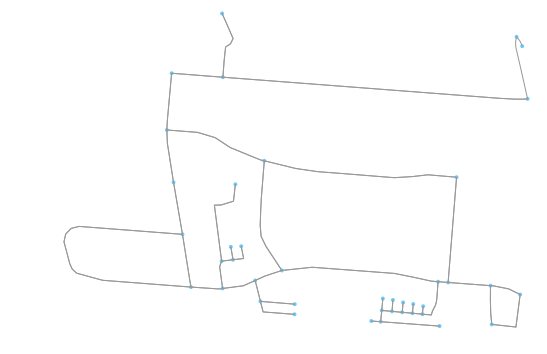

(<matplotlib.figure.Figure at 0x110a8e5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110839710>)

In [5]:
import osmnx as ox

address = '567 Stinchcomb Drive, Columbus, Ohio'
distance=300
network_type='drive'

G = ox.project_graph(ox.graph_from_address(address, distance))
ox.plot_graph(G)



In [6]:
G1, I = convert_to_traffic_graph(G)

In [10]:
t=[]
for _,x in G1.nodes(data='x'):
    if x is None:
        t.append(_)

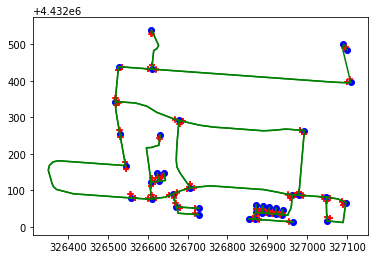

In [10]:
%matplotlib inline
import mpld3
from matplotlib import pyplot as plt

mpld3.enable_notebook()

fig, axis = plt.subplots(1,1)
# print(len(I))
for i, v in I.items():
    axis.scatter(v.get_x(), v.get_y(),marker='o' ,c='blue')
    
    for node in v.get_nodes():
        axis.scatter(node.get_x(), node.get_y(), marker='+', c='red')
        
for edge in G1.edges(data=True):
    road = edge[2]['object']
    if not road.get_name() == 'turn':
#         continue
        road_string = road.get_road_string()
        line_string = road_string.get_line_string()
        x,y = line_string.coords.xy
        axis.plot(x,y, 'green')
        

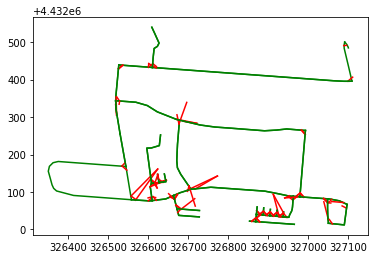

In [7]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1)
for edge in G1.edges(data=True):
    road = edge[2]['object']
    if not road.get_name() == 'turn':
#         continue
        road_string = road.get_road_string()
        line_string = road_string.get_line_string()
        x,y = line_string.coords.xy
        plt.plot(x,y, 'green')
    else:
#         continue
        road_string = road.get_road_string()
        line_string = road_string.get_line_string()
        x,y = line_string.coords.xy
        plt.plot(x,y, 'red')
        
    

In [75]:

G.succ[229703693], G.succ[3831576280], G.succ[3831576300]
G.pred[229703693], G.pred[3831576280], G.pred[3831576300]

(AdjacencyView({3831576300: {0: {'oneway': True, 'lanes': '2', 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff46d698240>, 'highway': 'tertiary', 'name': 'Olentangy River Road', 'osmid': 542180454, 'length': 18.526908704495426}}}),
 AdjacencyView({229703693: {0: {'oneway': True, 'lanes': '2', 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff46d8c30b8>, 'highway': 'tertiary', 'name': 'Olentangy River Road', 'osmid': 44631792, 'length': 106.80311521767831}}, 229703709: {0: {'oneway': False, 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff46d7325c0>, 'highway': 'residential', 'name': 'Riverview Drive', 'osmid': 21356684, 'length': 499.46387343130692}}}),
 AdjacencyView({}))

229732855 {5242033209: {0: {'length': 46.814877752563419, 'highway': 'residential', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f4c086ce828>, 'osmid': 21405600, 'oneway': False, 'name': 'Harley Drive'}}, 5242033228: {0: {'length': 257.44784362312402, 'highway': 'residential', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f4c086ce7b8>, 'osmid': 21405600, 'oneway': False, 'name': 'Harley Drive'}}, 229732876: {0: {'length': 194.37394018956027, 'highway': 'residential', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f4c086ce748>, 'osmid': 21359082, 'oneway': False, 'name': 'St Johns Court'}}}